# Plotting and Visualization

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = np.arange(10)

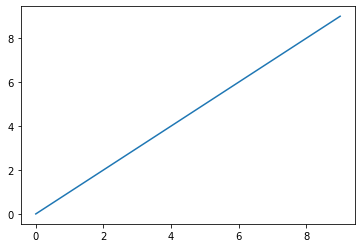

In [4]:
plt.plot(data)

<AxesSubplot:>

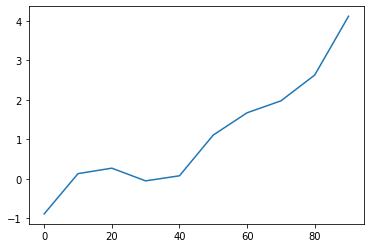

In [14]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

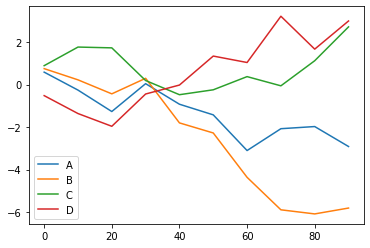

In [19]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns = ['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot()

<AxesSubplot:>

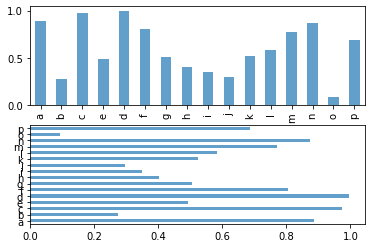

In [25]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcedfghijklmnop'))
data.plot.bar(ax=axes[0], alpha=0.7)
data.plot.barh(ax=axes[1], alpha=0.7)

In [24]:
import seaborn as s

<AxesSubplot:>

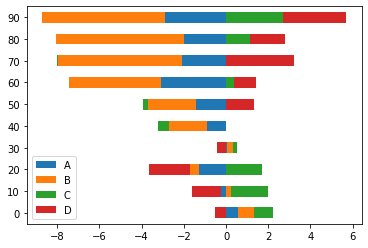

In [27]:
df.plot.barh(stacked=True)

In [33]:
tips = pd.read_csv("./data/tips.csv")
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [35]:
party_counts = party_counts.loc[:, 2:5]

In [46]:
# axis = 0 : index 기준으로, axis = 1 : column 기준으로
party_pcts = party_counts.div(party_counts.sum(axis=1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

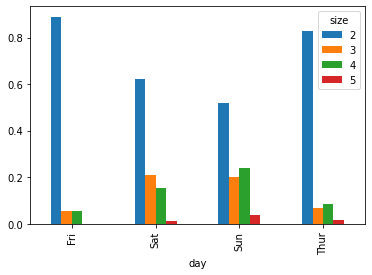

In [47]:
party_pcts.plot.bar()

In [48]:
import seaborn as sns

In [50]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

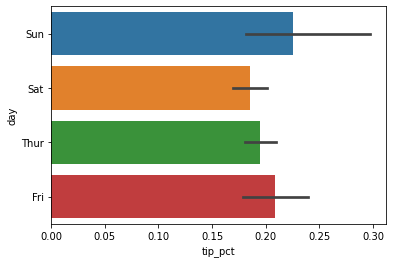

In [52]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

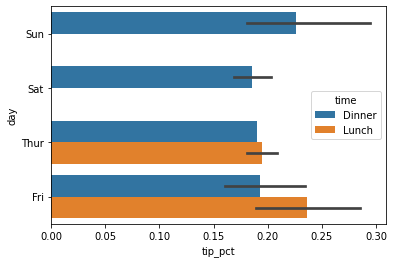

In [53]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

<AxesSubplot:ylabel='Density'>

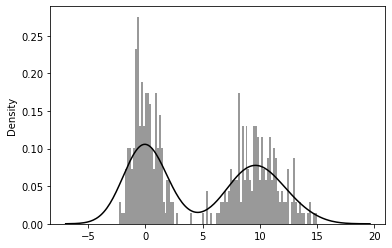

In [54]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

In [56]:
macro = pd.read_csv('./data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'change in log m1 versuls log unemp')

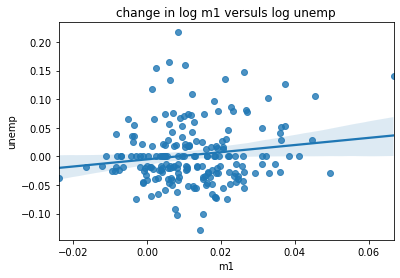

In [60]:
# 모집단의 regression이 highlight된 부분에 존재한다 이말인가?
sns.regplot('m1', 'unemp', data=trans_data)
plt.title("change in log %s versuls log %s" % ('m1', 'unemp'))

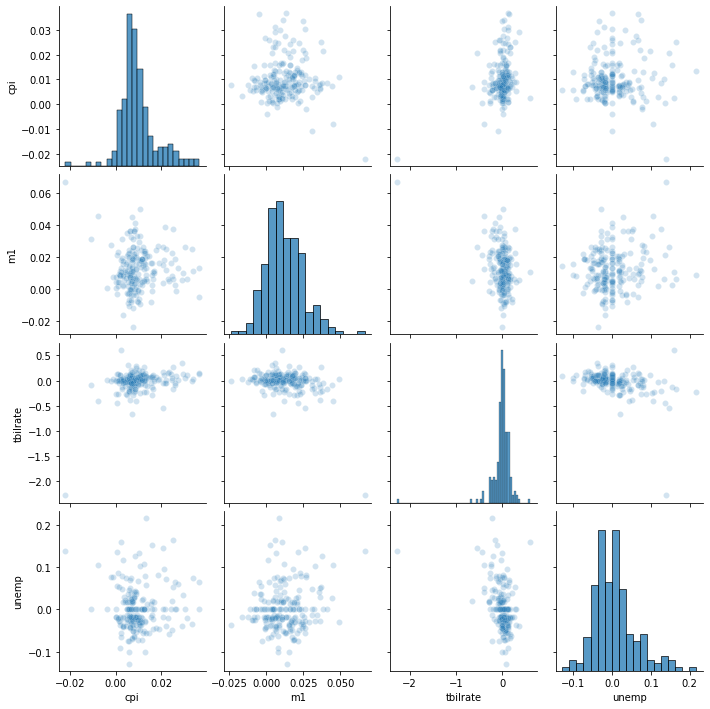

In [62]:
sns.pairplot(trans_data, diag_kind='hist', plot_kws={'alpha':0.2})

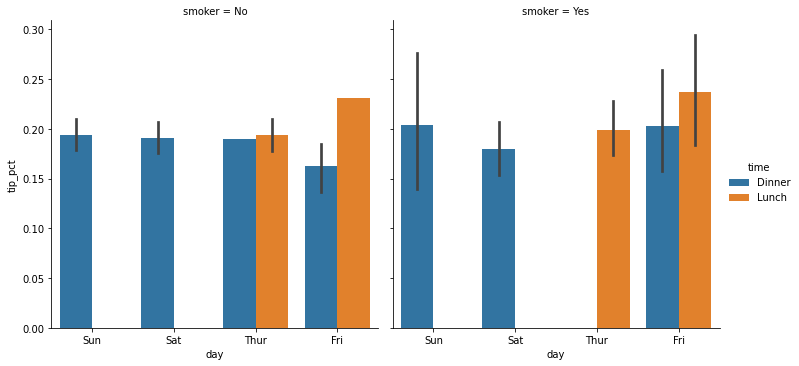

In [64]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind = 'bar', data=tips[tips.tip_pct<1])